# EDA and Visualization

## Import, install and read

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

In [2]:
'''df = pd.read_csv('data/all_data.csv')
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
# df_sample = pd.read_csv('data/sample_submission.csv')
df_test_private = pd.read_csv('data/test_private_expanded.csv')
df_test_public = pd.read_csv('data/test_public_expanded.csv')
df_tox_annot = pd.read_csv('data/toxicity_individual_annotations.csv')
df_ident_annot = pd.read_csv('data/identity_individual_annotations.csv')'''
df_merged = pd.read_csv('data/merged_data.csv')

## EDA

In [3]:
df_merged.head(3)

,id,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,toxicity,toxic
0,59856,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.87234,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0.00,4,47,0.893617,1
1,239579,This is a great story. Man. I wonder if the pe...,0.000000,0.293333,0.000000,0.32000,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0.04,10,75,0.440000,0
2,239592,"Angry trolls, misogynists and Racists"", oh my....",0.000000,0.000000,0.100000,0.50000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.00,4,10,0.500000,1


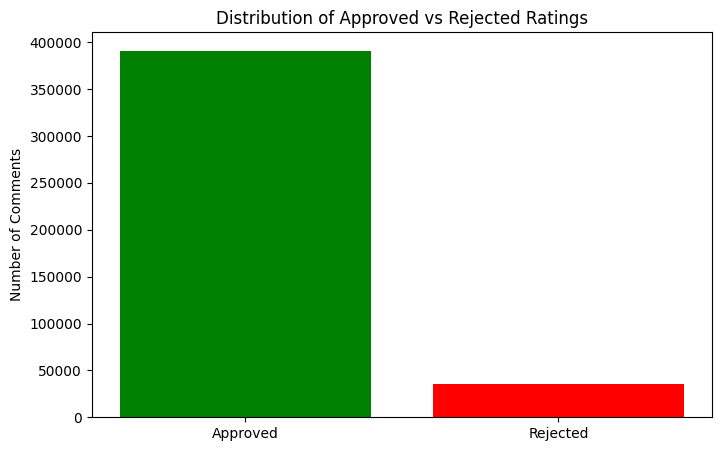

In [4]:
# counting
counts = df_merged['rating'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values, color=['green', 'red'])
plt.xticks(counts.index, ['Approved', 'Rejected'])
plt.title('Distribution of Approved vs Rejected Ratings')
plt.ylabel('Number of Comments')
plt.show()

In [5]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426705 entries, 0 to 426704
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   426705 non-null  int64  
 1   comment_text                         426705 non-null  object 
 2   severe_toxicity                      426705 non-null  float64
 3   obscene                              426705 non-null  float64
 4   identity_attack                      426705 non-null  float64
 5   insult                               426705 non-null  float64
 6   threat                               426705 non-null  float64
 7   asian                                426705 non-null  float64
 8   atheist                              426705 non-null  float64
 9   bisexual                             426705 non-null  float64
 10  black                                426705 non-null  float64
 11  buddhist     

## Missing values

id                                     0
comment_text                           0
severe_toxicity                        0
obscene                                0
identity_attack                        0
insult                                 0
threat                                 0
asian                                  0
atheist                                0
bisexual                               0
black                                  0
buddhist                               0
christian                              0
female                                 0
heterosexual                           0
hindu                                  0
homosexual_gay_or_lesbian              0
intellectual_or_learning_disability    0
jewish                                 0
latino                                 0
male                                   0
muslim                                 0
other_disability                       0
other_gender                           0
other_race_or_et

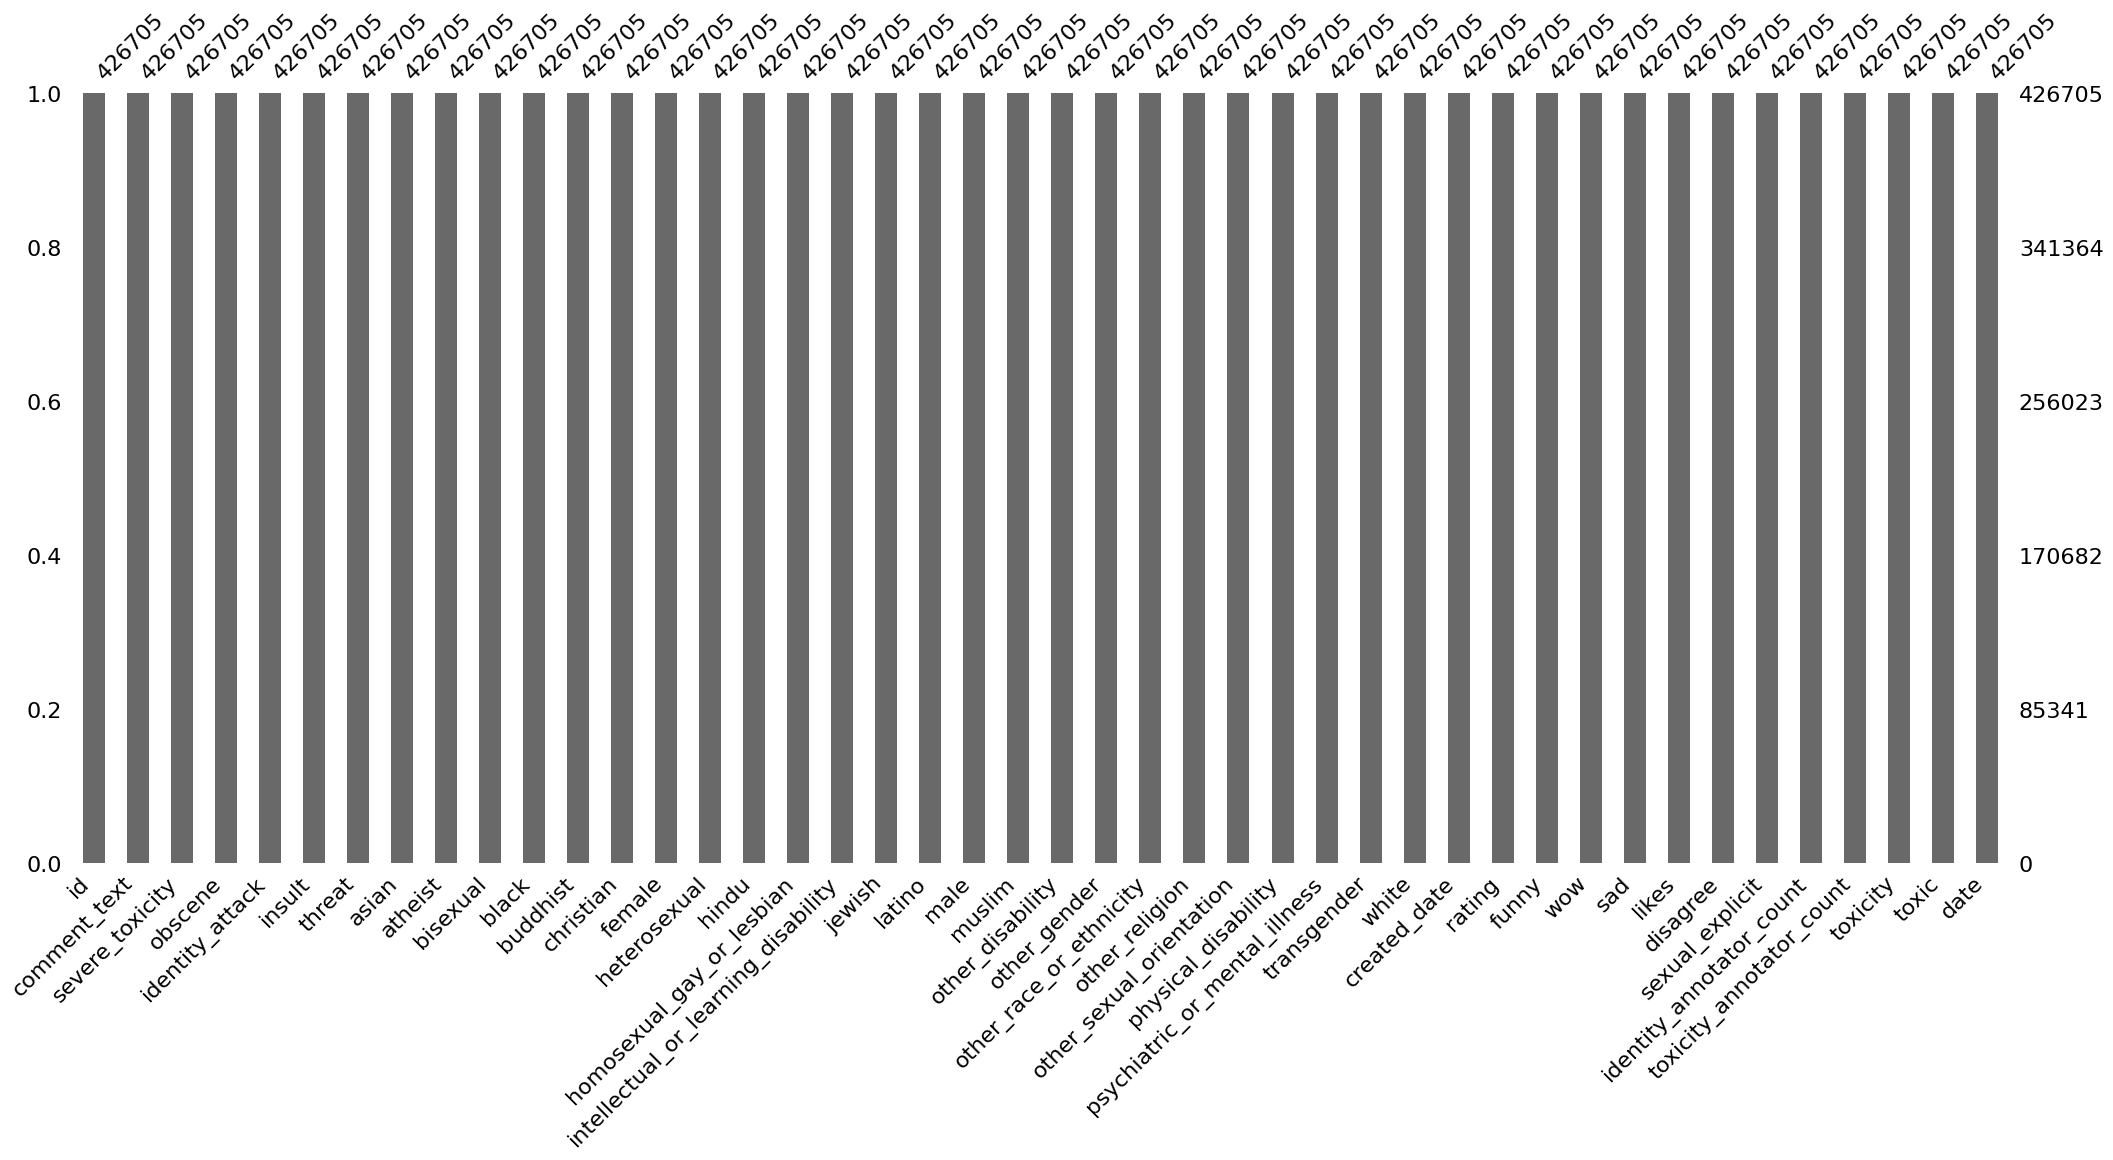

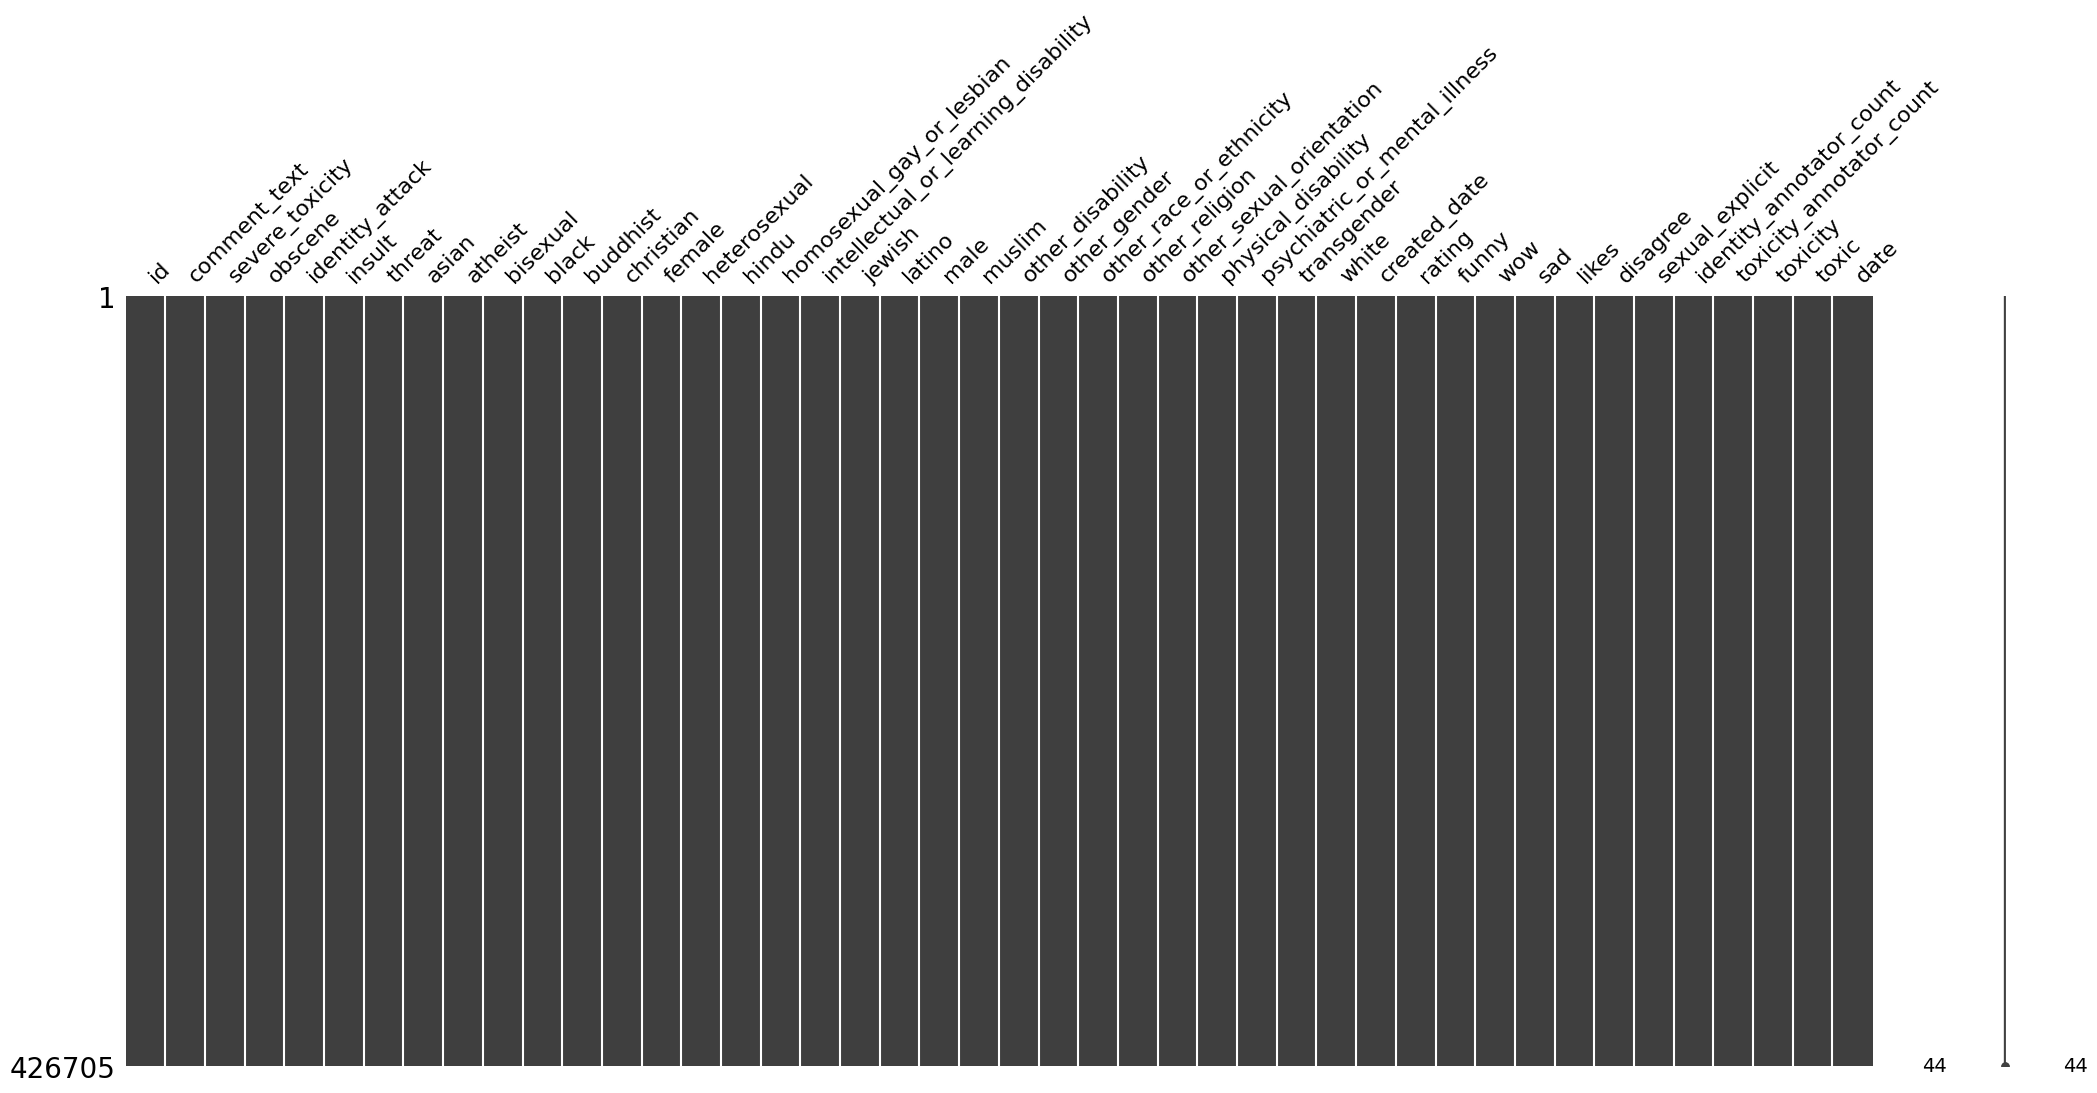

In [66]:
# overview of missing values
msno.bar(df_merged)
msno.matrix(df_merged)
df_merged.isna().sum()

- 1 = toxic
- 0 = no toxic

## **Time-Based Analysis**

- **Trends Over Time**: trends of toxic comments over time. This can help identify any temporal patterns.

In [7]:
df_merged['date'] =df_merged['created_date'].str.split(' ').str[0]
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [8]:
df_merged.sort_values(by='date', inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

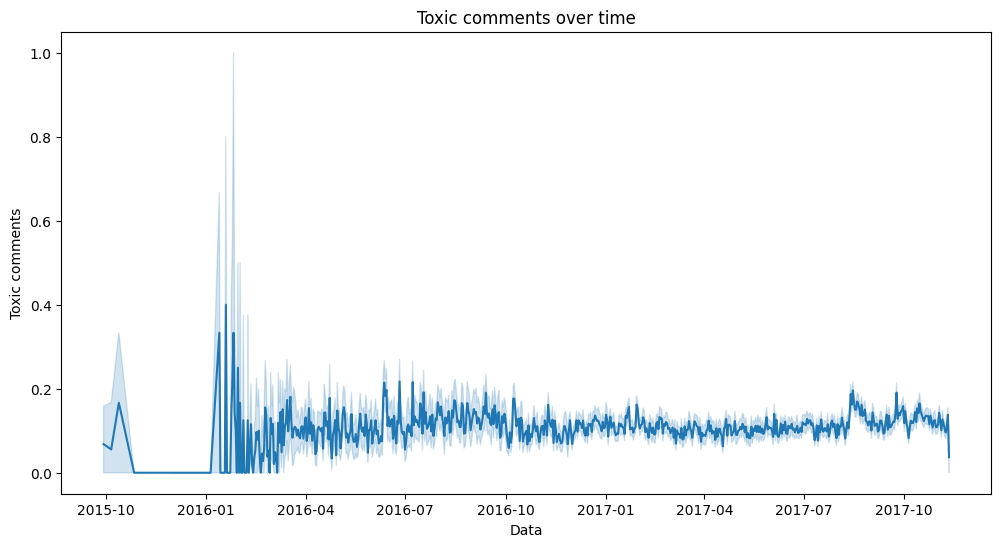

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='toxic', data=df_merged)

# Configurando rótulos e título
plt.title('Toxic comments over time')
plt.xlabel('Data')
plt.ylabel('Toxic comments')
plt.show

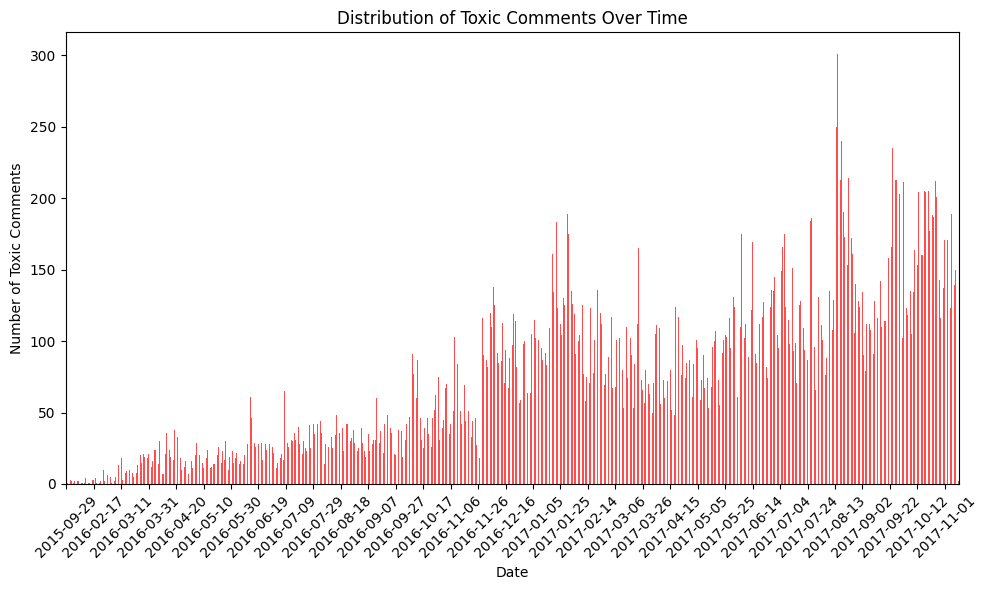

In [10]:
daily_toxic_counts = df_merged[df_merged['toxic'] == 1].groupby('date').size()

# Plot the distribution of toxic comments over time
plt.figure(figsize=(10, 6))
daily_toxic_counts.plot(kind='bar', color='red', alpha=0.7)

# Manually set x-axis labels to display every 7 days
plt.xticks(range(0, len(daily_toxic_counts), 20), [str(date.date()) for date in daily_toxic_counts.index[::20]], rotation=45)

plt.title('Distribution of Toxic Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Toxic Comments')
plt.tight_layout()
plt.show()


# refazer o grafico com % de comentario toxicos / total coments

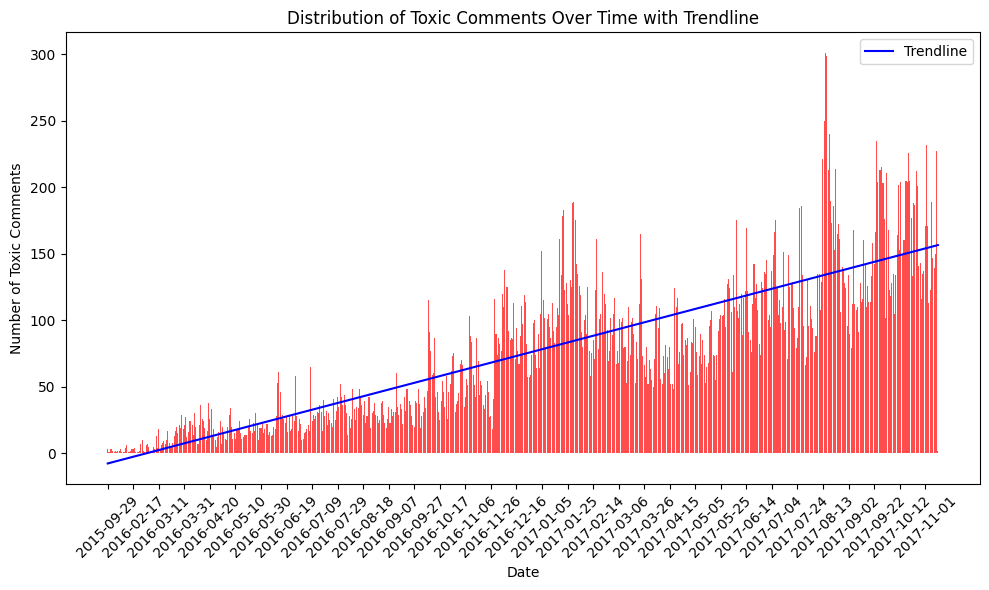

In [11]:
# Plot the distribution of toxic comments over time
plt.figure(figsize=(10, 6))

# Use range(len(daily_toxic_counts)) as x values
plt.bar(range(len(daily_toxic_counts)), daily_toxic_counts, color='red', alpha=0.7)

# Manually set x-axis labels to display every 7 days
plt.xticks(range(0, len(daily_toxic_counts), 20), [str(date.date()) for date in daily_toxic_counts.index[::20]], rotation=45)

# Add a trendline
x = np.arange(len(daily_toxic_counts))
coefficients = np.polyfit(x, daily_toxic_counts, 1)
trendline = np.polyval(coefficients, x)
plt.plot(x, trendline, color='blue', label='Trendline')

plt.title('Distribution of Toxic Comments Over Time with Trendline')
plt.xlabel('Date')
plt.ylabel('Number of Toxic Comments')
plt.legend()
plt.tight_layout()
plt.show()

## **Reaction Metrics**

- **Reactions to Toxic Comments**: Analyze how users react (likes or disagree) to toxic vs non-toxic comments. Scatter plots or grouped bar charts could be useful here.

- React: 'funny', 'wow', 'sad', 'likes', 'disagree'

In [36]:
df_react = df_merged.loc[:, ('funny', 'wow', 'sad', 'likes', 'disagree', 'toxic')]
# df_head = df_head[df_head['toxic'] == 1]

In [60]:
df_react['funny'].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
422279    0
422357    0
425119    0
425998    0
         ..
405106    0
405105    0
405104    0
405102    0
405126    0
Name: funny, Length: 426705, dtype: int64>

Percentage of comments with any reaction: 68.11%


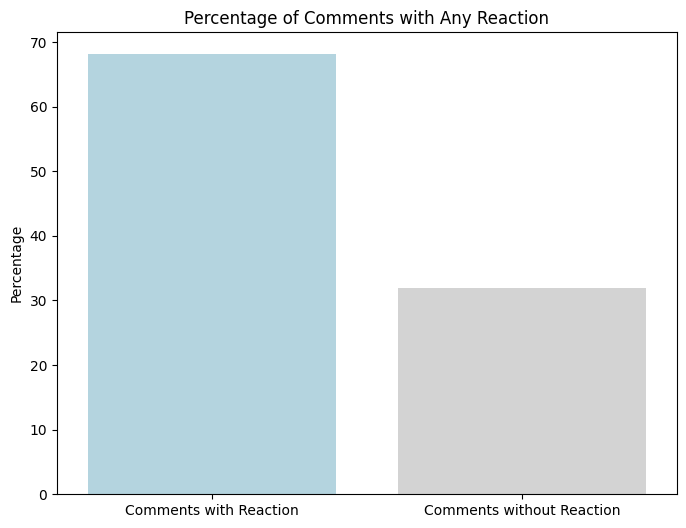

In [49]:
# Calculate the total number of comments with any reaction
df_react['any_reaction'] = (df_react[['funny', 'wow', 'sad', 'likes', 'disagree']] > 0).any(axis=1)
total_comments_with_reaction = df_react['any_reaction'].sum()

# Calculate the percentage of comments with any reaction
percentage_comments_with_reaction = (total_comments_with_reaction / len(df_react)) * 100

# Print the percentage
print(f"Percentage of comments with any reaction: {percentage_comments_with_reaction:.2f}%")

# Plot the percentage
plt.figure(figsize=(8, 6))
sns.barplot(x=['Comments with Reaction', 'Comments without Reaction'], y=[percentage_comments_with_reaction, 100 - percentage_comments_with_reaction], palette=['lightblue', 'lightgrey'])
plt.title('Percentage of Comments with Any Reaction')
plt.ylabel('Percentage')
plt.show()


Percentage of comments with reactions by toxicity:
With toxicity: 63.33%
Without toxicity: 36.67%


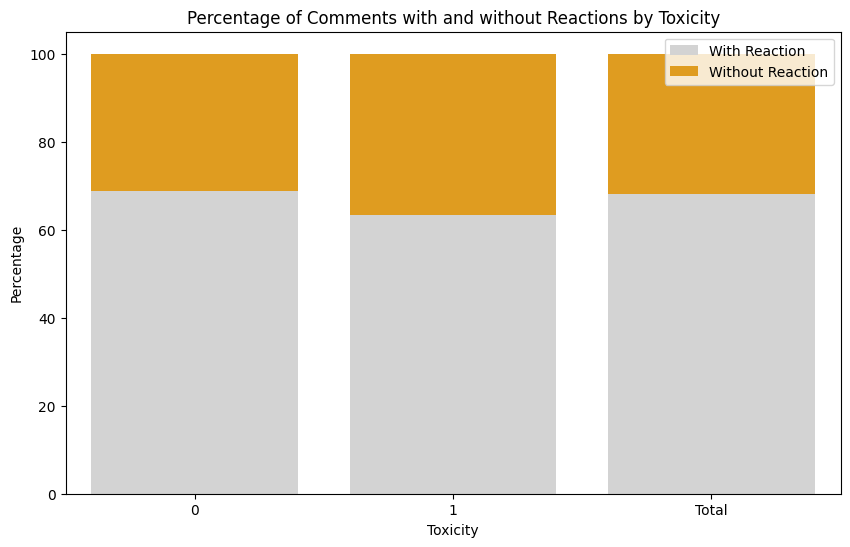

In [52]:
# Calculate the total number of comments with any reaction
df_react['any_reaction'] = (df_react[['funny', 'wow', 'sad', 'likes', 'disagree']] > 0).any(axis=1)

# Create a contingency table to count occurrences
contingency_table = pd.crosstab(df_react['toxic'], df_react['any_reaction'], margins=True, margins_name="Total")

# Calculate percentages
percentage_comments_with_reaction_and_toxic = (contingency_table[True] / contingency_table['Total']) * 100
percentage_comments_without_reaction_and_toxic = (contingency_table[False] / contingency_table['Total']) * 100

# Print the percentages
print("Percentage of comments with reactions by toxicity:")
print(f"With toxicity: {percentage_comments_with_reaction_and_toxic[True]:.2f}%")
print(f"Without toxicity: {percentage_comments_without_reaction_and_toxic[True]:.2f}%")

# Plot the percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=contingency_table.index, y=percentage_comments_with_reaction_and_toxic, color='lightgray', label='With Reaction')
sns.barplot(x=contingency_table.index, y=percentage_comments_without_reaction_and_toxic, color='orange', label='Without Reaction', bottom=percentage_comments_with_reaction_and_toxic)

plt.title('Percentage of Comments with and without Reactions by Toxicity')
plt.xlabel('Toxicity')
plt.ylabel('Percentage')
plt.legend()
plt.show()

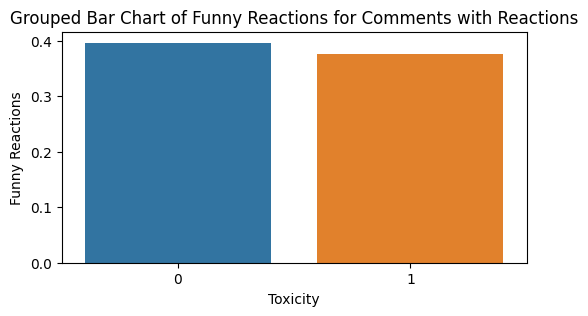

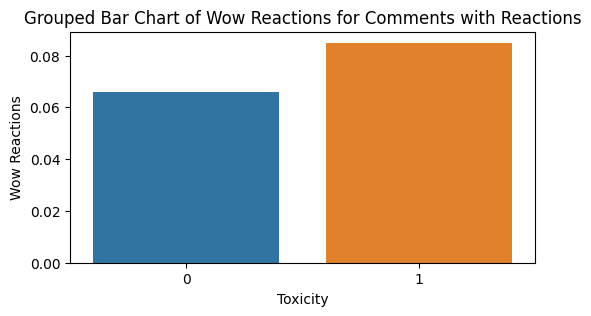

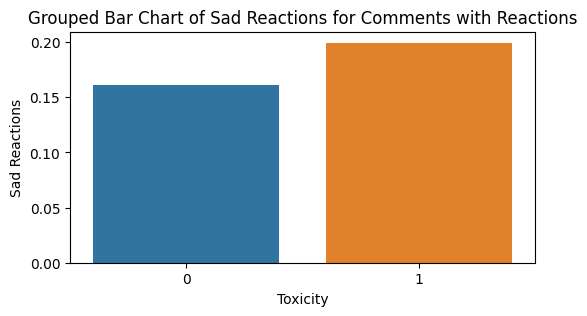

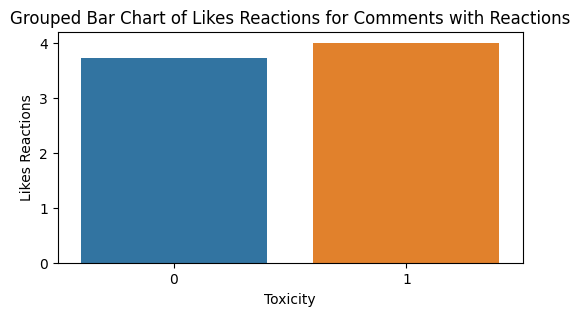

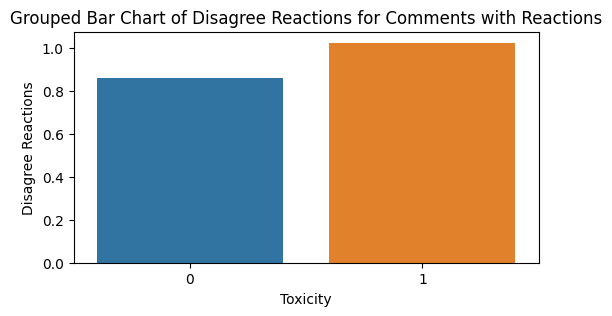

In [55]:
df_react_with_reaction = df_react[df_react[['funny', 'wow', 'sad', 'likes', 'disagree']].sum(axis=1) > 0]

reactions = ['funny', 'wow', 'sad', 'likes', 'disagree']

for reaction in reactions:
    plt.figure(figsize=(6, 3))
    sns.barplot(data=df_react_with_reaction, x='toxic', y=reaction, ci=None)
    plt.title(f'Grouped Bar Chart of {reaction.capitalize()} Reactions for Comments with Reactions')
    plt.xlabel('Toxicity')
    plt.ylabel(f'{reaction.capitalize()} Reactions')
    plt.show()

## **Annotator Insights**

- **Annotator Count Analysis**: Examine the identity_annotator_count  to see if there’s any pattern in the number of annotators for different levels of toxicity or subgroups.

In [65]:
df_merged.columns

Index(['id', 'comment_text', 'severe_toxicity', 'obscene', 'identity_attack',
       'insult', 'threat', 'asian', 'atheist', 'bisexual', 'black', 'buddhist',
       'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count', 'toxicity',
       'toxic', 'date'],
      dtype='object')

In [64]:
df_annotator = df_merged.loc[:,'toxicity_annotator_count','identity_annotator_count','toxic']

0         47
422279     4
422357     4
425119     4
425998     4
          ..
405106     4
405105     6
405104     4
405102     5
405126     4
Name: toxicity_annotator_count, Length: 426705, dtype: int64

In [63]:
df_merged['identity_annotator_count']

0          4
422279     4
422357     4
425119     4
425998     4
          ..
405106     4
405105     4
405104    10
405102     6
405126     4
Name: identity_annotator_count, Length: 426705, dtype: int64